**Desarrollo del Laboratorio 1.0:** 

Dataset: cancer

Por: Juliana del Valle Pérez 

correo: juliana.delvalle1@udea.edu.co

Para el dataset realizar lo siguiente:

1. Leer los datos desde la página web

2. Renombrar las columnas en PascalCase
  Ejemplo: La columna radius_worst, concave points_se deberia llamar: RadiusWorst, ConcavePointsSe

3. Emplear los metodos head, tail, describe,info para obtener información acerca del dataframe,

4. Contabilizar la cantidad de null or nan en el dataframe, si hay null, ¿que valor se puede tomar para reemplazar los datos?

5. Encontrar los valores  diferentes en el target, mostrar que es B y M. Emplear el metodo unique.

6. Empleando la libreria seaborn y el metodo countplot, realice un conteo de las personas que tiene la etiqueta B y M.

  ```python
  import seaborn as sns
  sns.countplot?
  ```

7. Agregar una nueva columna llamada DiagnosisNumeric, en la que cada valor B, M se corresponde con un valor 0, 1 respectivamente.

8. Normalizar cada columna respecto a su media y desviación estandar: (x-mean(x))/std(x)

9. Realizar un promedio de todas las características similares, llamelas:

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"SymetryMean","FractalDimensionMean"]
```

Para encontrar las características similares, radius1, radius2, radius3 y tomar los promedios puede emplear expresiones regulares como:

```python
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```

con base a lo anterior forme los patrones a buscar, es decir:

```python
[Radius, Texture, Perimeter, ...]
```
 y con base en ello, emplee el metodo `startwith` para un string.  



10. En un mismo gráfico mostrar el histograma de la columna RadiusMean  para la etiqueta B y M en color naranja y azul de la columna Diagnosis respectivamente.

11. Para las columnas:
```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean','SmoothnessMean', 'CompactnessMean', 'ConcavityMean','ConcavePointsMean',"symmetry3","fractal_dimension3"]```

realizar multiples histograma en un gráfico de [violin](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis",var_name="features",value_name="value")
sns.violinplot(x="features",y="value",  hue="Diagnosis",data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

10. Determinar los datos [outlier](https://en.wikipedia.org/wiki/Outlier)  para la columna RadiusMean y eliminarlos del data frame, para ello construya un gráfico tipo [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)


```
df.boxplot(column="RadiusMean", by='Diagnosis', sym = 'k.', figsize=(18,6))
```

¿Qué informacion podemos obtener de este tipo de gráficos?


Usar el rango intercuartílico (IQR): El IQR es la diferencia entre el tercer y el primer cuartil de los datos, es decir, el 75% y el 25% de los valores ordenados. Los valores que están fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de una columna llamada 'edad' usando el IQR, podemos hacer lo siguiente

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra forma de determinar los outlier es con el puntaje Z:
El puntaje Z es el número de desviaciones estándar que un valor está por encima o por debajo de la media. Los valores que tienen un puntaje Z mayor que un umbral (por ejemplo, 3) se consideran outliers y se pueden eliminar o reemplazar. Por ejemplo, si queremos eliminar los outliers de la columna 'edad' usando el puntaje Z, podemos hacer lo siguiente:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

En un problema de machine learning se debe elegir todas las columnas y construir un algoritmo que permite obtener la mejor calidad de los datos sobre todas las columnas.


11. Encontrar la matrix de correlacion, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

12. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?



## 0. Importa Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. Lee los datos desde la página web

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/static/public/17/data.csv")

## 2.Renombra las columnas en PascalCase 

In [3]:
print(f"Columnas Dataset:")
for col in df.columns:
    print(col, end=", ")

Columnas Dataset:
ID, radius1, texture1, perimeter1, area1, smoothness1, compactness1, concavity1, concave_points1, symmetry1, fractal_dimension1, radius2, texture2, perimeter2, area2, smoothness2, compactness2, concavity2, concave_points2, symmetry2, fractal_dimension2, radius3, texture3, perimeter3, area3, smoothness3, compactness3, concavity3, concave_points3, symmetry3, fractal_dimension3, Diagnosis, 

In [4]:
def ConviertePascalCase(columnas):
    #Retorna un nuevo diccionario donde la llave es el nombre anterior de la columna,
    #y el valor es el nombre en pasal case
    dic = {}
    for col in columnas:
        nombrePascal = list(map(lambda x: x.capitalize(),  col.split("_"))) # Lista con las palabras capitalizadas
        
        nombrePascal = " ".join(nombrePascal) # Junta las plabras por espacio
        
        dic[col] = nombrePascal
    return dic

In [5]:
#notación pascal case
df = df.rename(columns= ConviertePascalCase(df.columns))

In [6]:
print(f"Columnas Dataset:")
for col in df.columns:
    print(col, end=", ")

Columnas Dataset:
Id, Radius1, Texture1, Perimeter1, Area1, Smoothness1, Compactness1, Concavity1, Concave Points1, Symmetry1, Fractal Dimension1, Radius2, Texture2, Perimeter2, Area2, Smoothness2, Compactness2, Concavity2, Concave Points2, Symmetry2, Fractal Dimension2, Radius3, Texture3, Perimeter3, Area3, Smoothness3, Compactness3, Concavity3, Concave Points3, Symmetry3, Fractal Dimension3, Diagnosis, 

## 3. Emplea los metodos head, tail, describe,info para obtener información acerca del dataframe


In [7]:
df.head()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [8]:
df.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3,Diagnosis
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B


In [9]:
df.describe()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  569 non-null    int64  
 1   Radius1             569 non-null    float64
 2   Texture1            569 non-null    float64
 3   Perimeter1          569 non-null    float64
 4   Area1               569 non-null    float64
 5   Smoothness1         569 non-null    float64
 6   Compactness1        569 non-null    float64
 7   Concavity1          569 non-null    float64
 8   Concave Points1     569 non-null    float64
 9   Symmetry1           569 non-null    float64
 10  Fractal Dimension1  569 non-null    float64
 11  Radius2             569 non-null    float64
 12  Texture2            569 non-null    float64
 13  Perimeter2          569 non-null    float64
 14  Area2               569 non-null    float64
 15  Smoothness2         569 non-null    float64
 16  Compactn

## 4.Contabiliza la cantidad de null or nan en el dataframe


In [11]:
#cuenta los valores que son nulos por columna
df.isnull().sum()

Id                    0
Radius1               0
Texture1              0
Perimeter1            0
Area1                 0
Smoothness1           0
Compactness1          0
Concavity1            0
Concave Points1       0
Symmetry1             0
Fractal Dimension1    0
Radius2               0
Texture2              0
Perimeter2            0
Area2                 0
Smoothness2           0
Compactness2          0
Concavity2            0
Concave Points2       0
Symmetry2             0
Fractal Dimension2    0
Radius3               0
Texture3              0
Perimeter3            0
Area3                 0
Smoothness3           0
Compactness3          0
Concavity3            0
Concave Points3       0
Symmetry3             0
Fractal Dimension3    0
Diagnosis             0
dtype: int64

In [12]:
#cuenta los valores que son nulos por columna
df.isna().sum()

Id                    0
Radius1               0
Texture1              0
Perimeter1            0
Area1                 0
Smoothness1           0
Compactness1          0
Concavity1            0
Concave Points1       0
Symmetry1             0
Fractal Dimension1    0
Radius2               0
Texture2              0
Perimeter2            0
Area2                 0
Smoothness2           0
Compactness2          0
Concavity2            0
Concave Points2       0
Symmetry2             0
Fractal Dimension2    0
Radius3               0
Texture3              0
Perimeter3            0
Area3                 0
Smoothness3           0
Compactness3          0
Concavity3            0
Concave Points3       0
Symmetry3             0
Fractal Dimension3    0
Diagnosis             0
dtype: int64

No tiene valores Nulos

## 5.Encuentra los valores diferentes en el target

In [13]:
target = df.Diagnosis
print(f"Los valor diferentes en target son: {target.unique()}\nM: masa maligna \t B: masa Benigna")

Los valor diferentes en target son: ['M' 'B']
M: masa maligna 	 B: masa Benigna


## 6. Con  sns.countplot, realiza un conteo de las personas que tiene la etiqueta B y M.


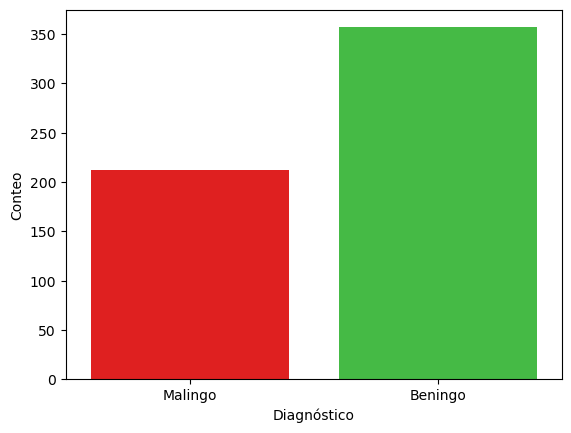

In [14]:
fig, ax = plt.subplots()

sns.countplot(df.replace({"M":"Malingo", "B":"Beningo"}), 
              x="Diagnosis" , ax = ax, palette=["red", "limegreen"])

ax.set(ylabel="Conteo", xlabel="Diagnóstico");

## 7. Agrega DiagnosisNumeric

In [15]:
df["DiagnosisNumeric"] = df.Diagnosis.replace({"M": 1, "B": 0})

In [16]:
df.tail()

,Id,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,...,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3,Diagnosis,DiagnosisNumeric
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,1
568,92751,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,B,0


## 8. Normaliza cada columna respecto a su media y desviación estandar: 


In [17]:
def f1(array):
    #renormaliza los datos de una columna
    mean = np.mean(array)
    std = np.std(array)
    
    return (array - mean)/std

In [18]:
#No toma en cuenta la columna con los diagnosticos en str, ni el ID
df = df.drop(columns=["Diagnosis", "Id"]).apply(f1) 
df.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave Points1,Symmetry1,Fractal Dimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave Points3,Symmetry3,Fractal Dimension3,DiagnosisNumeric
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676


## 9. Realizar un promedio de todas las características similares:

In [19]:
caracteristicas = ['Radius', 'Texture', 'Perimeter', 'Area','Smoothness', 'Compactness', 
 'Concavity','Concave Points',"Symmetry","Fractal Dimension"]

In [20]:
df_similares = pd.DataFrame()

for nombre in caracteristicas:
    #filter retorna las columnas para las cuales research(regex) es Verdadero
    df_similares[nombre + "Mean"] = df.filter(regex=nombre, axis=1).mean(axis=1)

In [21]:
df_similares.head()

,RadiusMean,TextureMean,PerimeterMean,AreaMean,SmoothnessMean,CompactnessMean,ConcavityMean,Concave PointsMean,SymmetryMean,Fractal DimensionMean
0,1.824496,-1.332631,2.135522,1.824397,0.887384,2.405680,1.828809,1.829790,2.038965,1.699948
1,1.378334,-0.533026,1.161469,1.513866,-0.602642,-0.536814,-0.203792,0.631797,-0.349316,-0.228969
2,1.440145,-0.115957,1.254969,1.398835,0.390871,0.983610,0.810510,1.805686,0.776325,0.032314
3,-0.241333,0.092436,-0.185344,-0.534288,2.455843,3.346862,1.575001,1.580833,4.548702,3.964480
4,1.439805,-1.136277,1.462767,1.412437,0.661332,0.059142,0.937554,1.100652,-0.413002,-0.153407


## 10. Muestra el histograma de la columna RadiusMean para la etiqueta B y M 

In [22]:
df_similares["Diagnosis"] = target

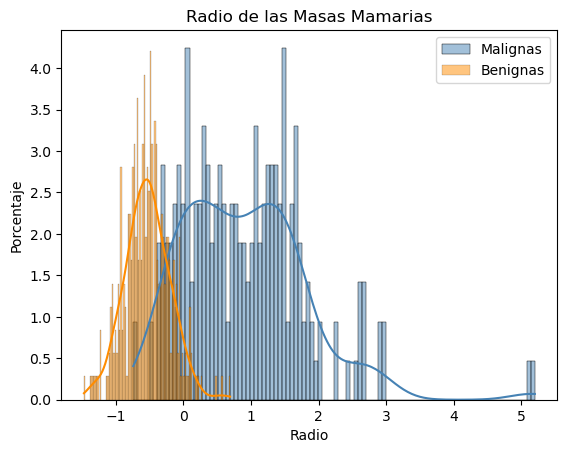

In [23]:
#agrupa los datos por diagnostico
diagnosis_group = df_similares.groupby("Diagnosis")

fig, ax = plt.subplots()

#histograma de los radios correspondientes a M
sns.histplot(diagnosis_group.get_group("M").RadiusMean, 
             kde= True, bins=100, stat = 'percent', ax=ax, 
             color="steelblue", label="Malignas")  

#histograma de los radios correspondientes a B
sns.histplot(diagnosis_group.get_group("B").RadiusMean, kde= True, bins=100, stat = 'percent', ax=ax, 
             color="darkorange", label="Benignas")

ax.set(title = "Radio de las Masas Mamarias", ylabel="Porcentaje", xlabel="Radio")
ax.legend();


## 11. Grafico de Violin:


In [24]:
def genera_grafica_violin(df, col):
  
    fig, ax = plt.subplots()
    
    sns.violinplot(df_similares, x="Diagnosis",  y=col,
                   ax=ax, palette=['cornflowerblue','tomato'], saturation=0.9, hue="Diagnosis")
    ax.set(title=col, ylabel="");

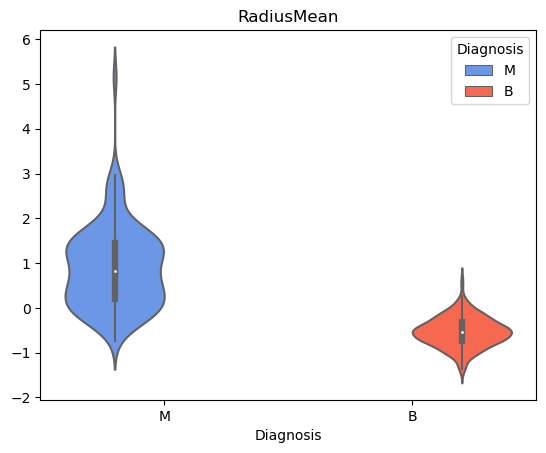

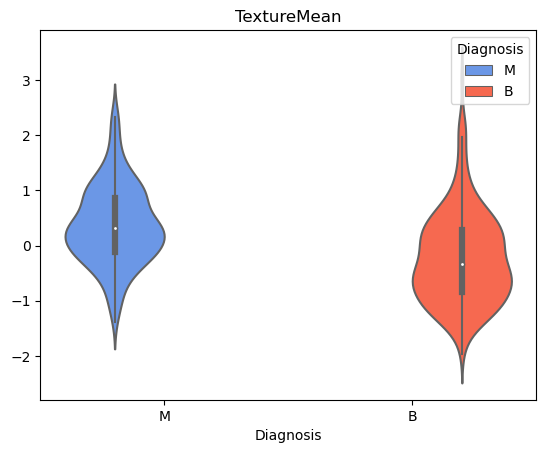

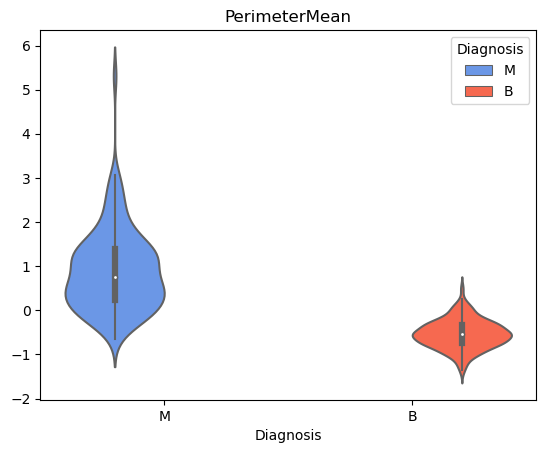

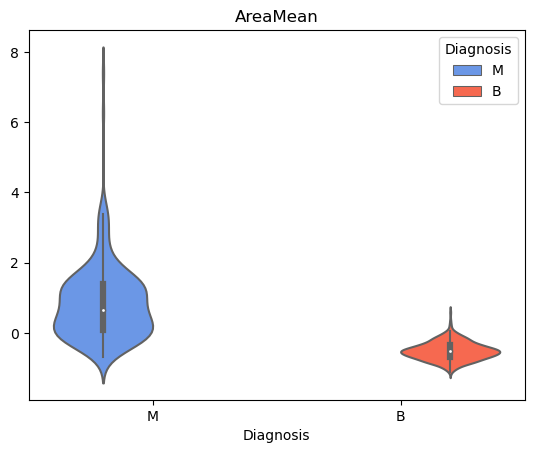

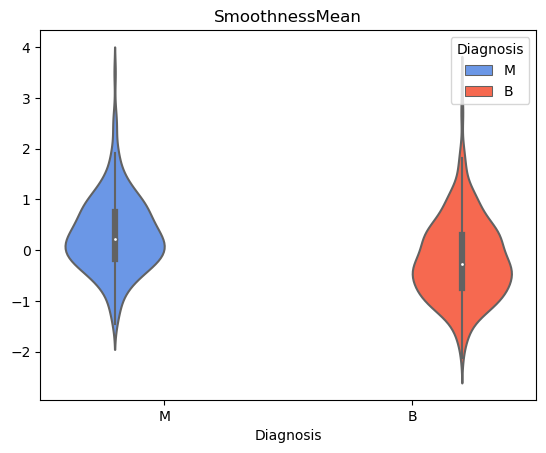

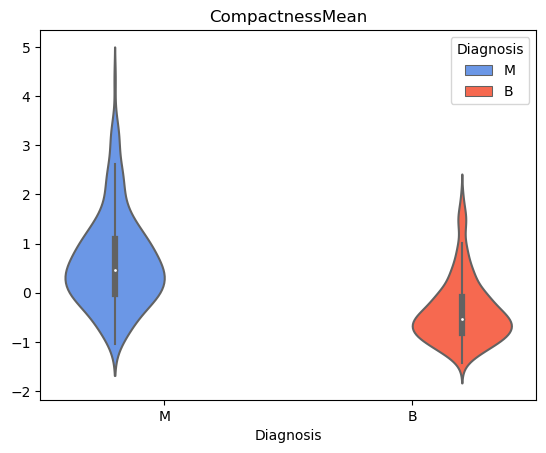

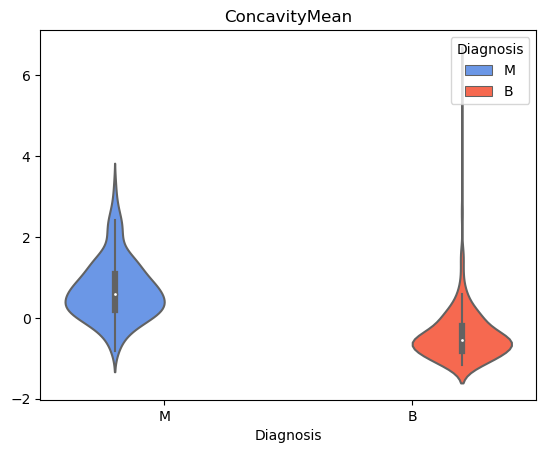

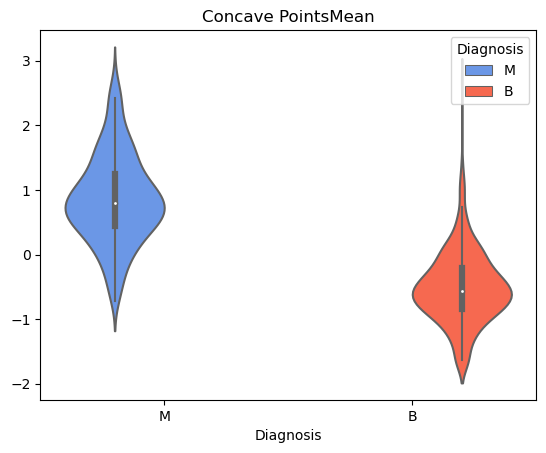

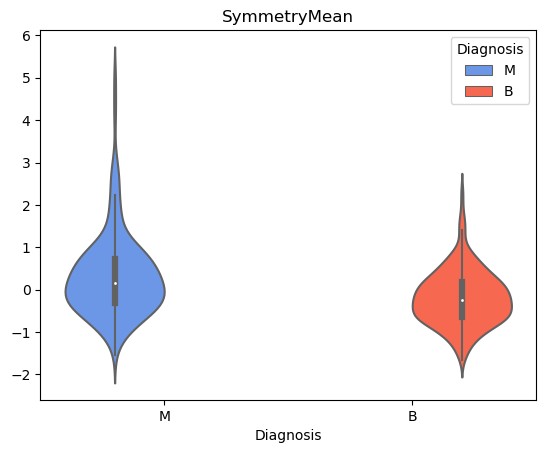

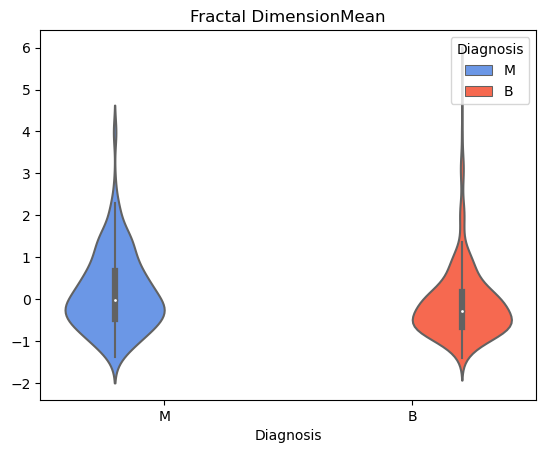

In [25]:
for col in df_similares.columns[:-1]:#se excluye la columna de diagnostico Numérico
    genera_grafica_violin(df_similares, col)

## 12. Determinar los datos outlier para la columna RadiusMean y los elimina

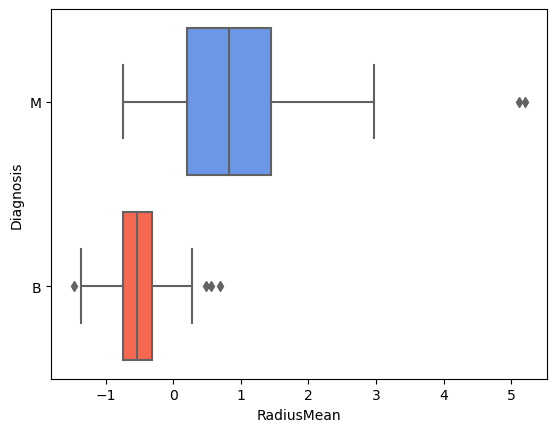

In [26]:
fig, ax = plt.subplots()
plt.style.use("ggplot")

sns.boxplot(df_similares, y="Diagnosis",  x="RadiusMean",
                   ax=ax, palette=['cornflowerblue','tomato'], saturation=0.9);

En el gráfico se pueden distinguir 6 outliers; sin embargo, es importante diferenciar los outliers de las masas malignas de los de las masas benignas, ya que, como se observa en el gráfico, las masas malignas suelen tener un radio medio más alto.

In [27]:
#Datos correspondientes al diagnostico M
df_similares_M = df_similares[df_similares["Diagnosis"] == "M"] 
Q1_M = df_similares_M['RadiusMean'].quantile(0.25) 
Q1_M = df_similares_M['RadiusMean'].quantile(0.25) 
Q3_M = df_similares_M['RadiusMean'].quantile(0.75) 
IQR_M = Q3_M - Q1_M 

es_M = df_similares["Diagnosis"] == "M" #condicion que verifica el diagnostico
#Condición que verifca que es un outlier segun el IQR de las masas malignas
outlier_M = (df_similares['RadiusMean'] < (Q1_M - 1.5 * IQR_M)) | (df_similares['RadiusMean'] > (Q3_M + 1.5 * IQR_M)) 

#Remplaza por NAN los datos que tiene el diagnostico M y que son outliers en el contexto de M
df_similares = df_similares.mask(es_M & outlier_M, other= pd.NA)


#==========================================================================================

#Datos correspondientes al diagnostico B
df_similares_B = df_similares[df_similares["Diagnosis"] == "B"]
Q1_B = df_similares_B['RadiusMean'].quantile(0.25) 
Q1_B = df_similares_B['RadiusMean'].quantile(0.25) 
Q3_B = df_similares_B['RadiusMean'].quantile(0.75) 
IQR_B = Q3_B - Q1_B 

es_B = df_similares["Diagnosis"] == "B" #condicion que verifica el diagnostico
#Condición que verifca que es un outlier segun el IQR de las masas Benignas
outlier_B = (df_similares['RadiusMean'] < (Q1_B - 1.5 * IQR_B)) | (df_similares['RadiusMean'] > (Q3_B + 1.5 * IQR_B)) 

#Remplaza por NAN los datos que tiene el diagnostico B y que son outliers en el contexto de B
df_similares = df_similares.mask(es_B & outlier_B, other= pd.NA)


In [28]:
print(f"El número de outliers encontrados es: {df_similares.RadiusMean.isna().sum()}")

El número de outliers encontrados es: 6


In [29]:
df_similares = df_similares.dropna() #Elimina los outlaiers

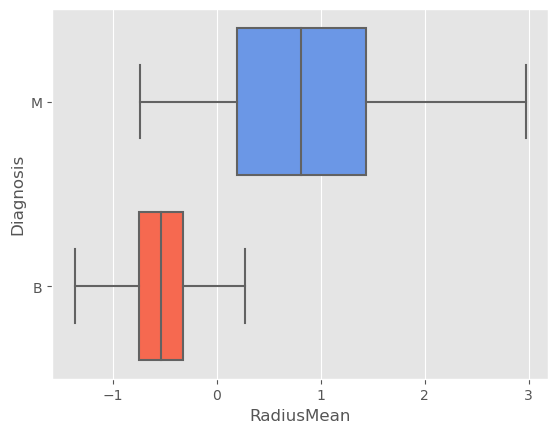

In [30]:
fig, ax = plt.subplots()
plt.style.use("ggplot")

sns.boxplot(df_similares, y="Diagnosis",  x="RadiusMean",
                   ax=ax, palette=['cornflowerblue','tomato'], saturation=0.9);

## 13. Encuentra la matrix de correlacion

<Axes: >

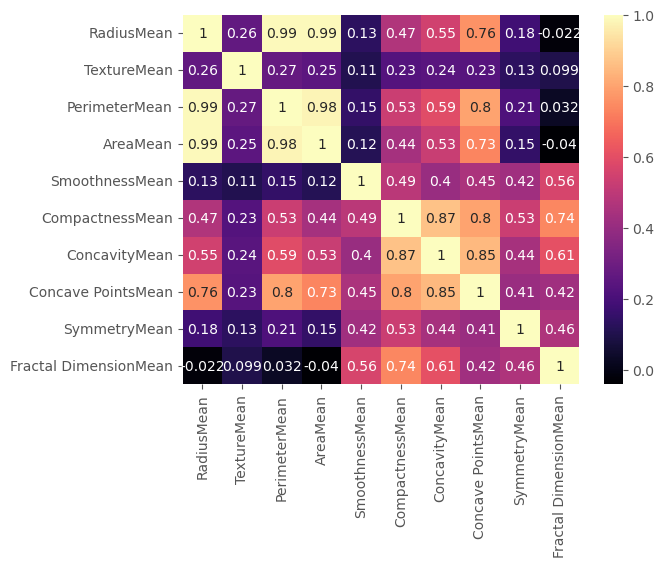

In [31]:
corr = df_similares.corr(numeric_only=True)
sns.heatmap(corr, cmap="magma", annot=True)

## 14. ¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Se pueden hacer boxplots para las otras características, diferenciando los diagnósticos, para comparar cómo se distribuyen los datos y la medida central de las características para las masas benignas y malignas. También se pueden hacer scatter plots, de nuevo diferenciando entre los diagnósticos. Por último, se puede hacer un gráfico de torta para comparar la proporción de pacientes con una masa benigna frente a una maligna.